<a href="https://colab.research.google.com/github/YasiruMM/Medicine-Prediction-Grp-22/blob/main/Finalised_NoiseHandling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/DSGP/updated_MediTrack_Dataset.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
# use statmodels to apply loess
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt


# Format Date Feature.

In [4]:
df[['Month', 'Year']] = df['Date'].astype(str).str.split('.', expand=True)
df['Month'] = df['Month'].astype(int)   # Convert Month to integer
df['Year'] = df['Year'].astype(int) + 2000  # Convert 24 → 2024 (assuming it's recent data)

In [5]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
print(df['Date'].head())

0   2024-02-01
1   2024-02-01
2   2024-02-01
3   2024-02-01
4   2024-02-01
Name: Date, dtype: datetime64[ns]


# Applying Locally Estimated Scatterplot Smoothing on Sales

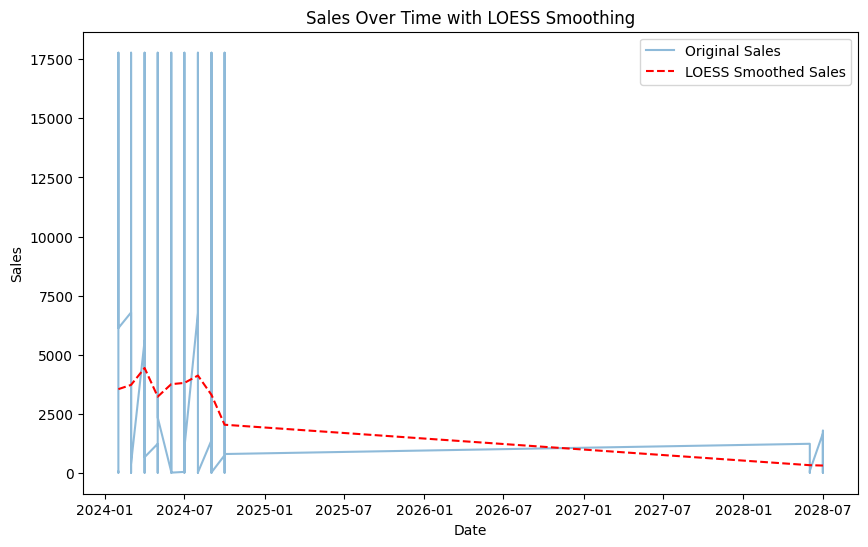

In [6]:
from statsmodels.nonparametric.smoothers_lowess import lowess
#Sort by the Month column
df = df.sort_values(by="Date")


# Apply LOESS smoothing to the Sales data
df['Sales_LOESS_Date'] = lowess(df['Sales'], df['Date'].astype(int), frac=0.2)[:, 1]
# Plot the original Sales vs. smoothed Sales
plt.figure(figsize=(10,6))
plt.plot(df["Date"], df["Sales"], label="Original Sales", alpha=0.5)
plt.plot(df["Date"], df["Sales_LOESS_Date"], label="LOESS Smoothed Sales", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Over Time with LOESS Smoothing")
plt.legend()
plt.show()


# Apply Log Transformation for reduce Noisiness

In [7]:
# List of features to apply log transformation (excluding 'Date' and categorical variables)
log_features = ['Retail Price', 'Purchase Price', 'Sales', 'Mean Sales', 'Buffer Stock']

# Apply log1p (log(1 + x) to avoid issues with zeros)
for feature in log_features:
    df[f'Log_{feature.replace(" ", "_")}'] = np.log1p(df[feature])

# ✅ Now df contains log-transformed versions of selected features!
print(df.head())  # Check the new columns





     Disease Category Drug Category    Drug Name Dosage  Retail Price  \
0      Cardiovascular       AMLODIP  AMLODAC 5MG    5MG         283.6   
1042         Diabetes        SULFON  GD-CARE 5MG    5MG         922.5   
1043         Diabetes        SULFON  GD-CARE 5MG    5MG         880.0   
1044         Diabetes        SULFON  GD-CARE 5MG    5MG        3969.0   
1045         Diabetes        SULFON  GD-CARE 5MG    5MG         906.5   

      Purchase Price  Sales       Date  Mean Sales         CV  \
0         325.600000   54.0 2024-02-01  443.900000  41.140192   
1042      764.848125   34.0 2024-02-01   46.927536  79.623976   
1043      764.848125   28.0 2024-02-01   46.927536  79.623976   
1044     2511.000000  123.0 2024-02-01   46.927536  79.623976   
1045      906.500000   34.0 2024-02-01   46.927536  79.623976   

      Buffer Percentage  Buffer Stock  Month  Year  Sales_LOESS_Date  \
0                    30           133      2  2024       3545.798478   
1042                 50   

# Noises check after Log Transformation

In [8]:
import seaborn as sns

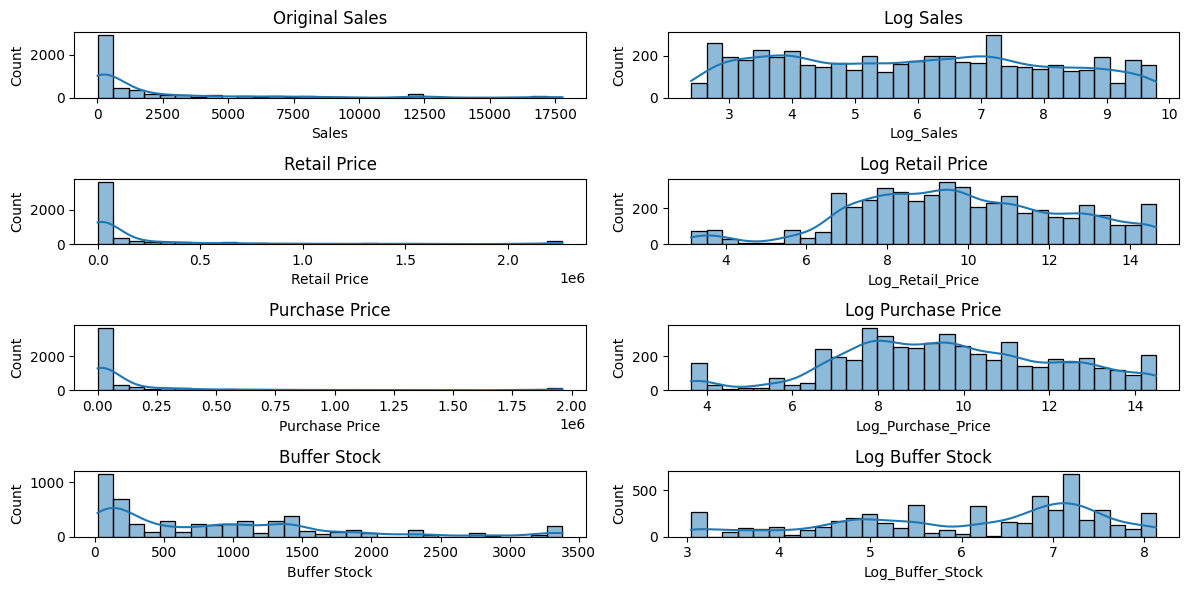

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(4,2,1)
sns.histplot(df['Sales'],bins=30,kde=True)
plt.title('Original Sales')

plt.subplot(4,2,2)
sns.histplot(df['Log_Sales'],bins=30,kde=True)
plt.title('Log Sales')

plt.subplot(4,2,3)
sns.histplot(df['Retail Price'],bins=30,kde=True)
plt.title('Retail Price')

plt.subplot(4,2,4)
sns.histplot(df['Log_Retail_Price'],bins=30,kde=True)
plt.title('Log Retail Price')

plt.subplot(4,2,5)
sns.histplot(df['Purchase Price'],bins=30,kde=True)
plt.title('Purchase Price')

plt.subplot(4,2,6)
sns.histplot(df['Log_Purchase_Price'],bins=30,kde=True)
plt.title('Log Purchase Price')

plt.subplot(4,2,7)
sns.histplot(df['Buffer Stock'],bins=30,kde=True)
plt.title('Buffer Stock')

plt.subplot(4,2,8)
sns.histplot(df['Log_Buffer_Stock'],bins=30,kde=True)
plt.title('Log Buffer Stock')

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('NoiseHandled1_MediTrack_Dataset.csv', index=False)
from google.colab import files
files.download('NoiseHandled1_MediTrack_Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>